## Loading Require Basic Library

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Test and Train Data Seperately

In [126]:
Churn_Train = pd.read_csv("Churn_Train.csv")
Churn_Test = pd.read_csv("Churn_Test.csv")

#### Head Of DataSet

In [4]:
Churn_Train.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


## MISSING DATA ANALYSIS FOR TEST AND TRAIN DATA

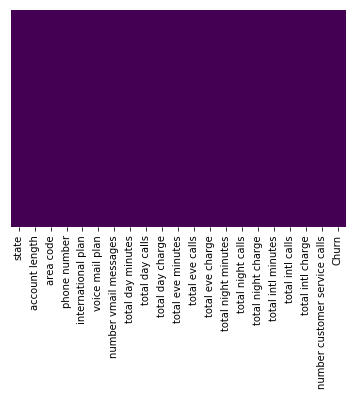

In [3]:
plt.figure(figsize=(6,4))
sns.heatmap(Churn_Train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

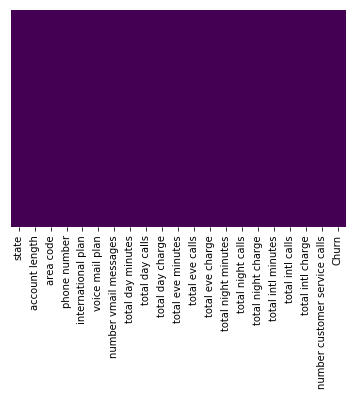

In [5]:
plt.figure(figsize=(6,4))
sns.heatmap(Churn_Test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Count Values Of Target Variable: Churn

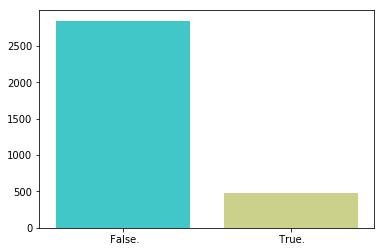

In [6]:
Y = Churn_Train["Churn"].value_counts()
sns.barplot(Y.index, Y.values, palette="rainbow")

### Analysis of Churn Response Via State

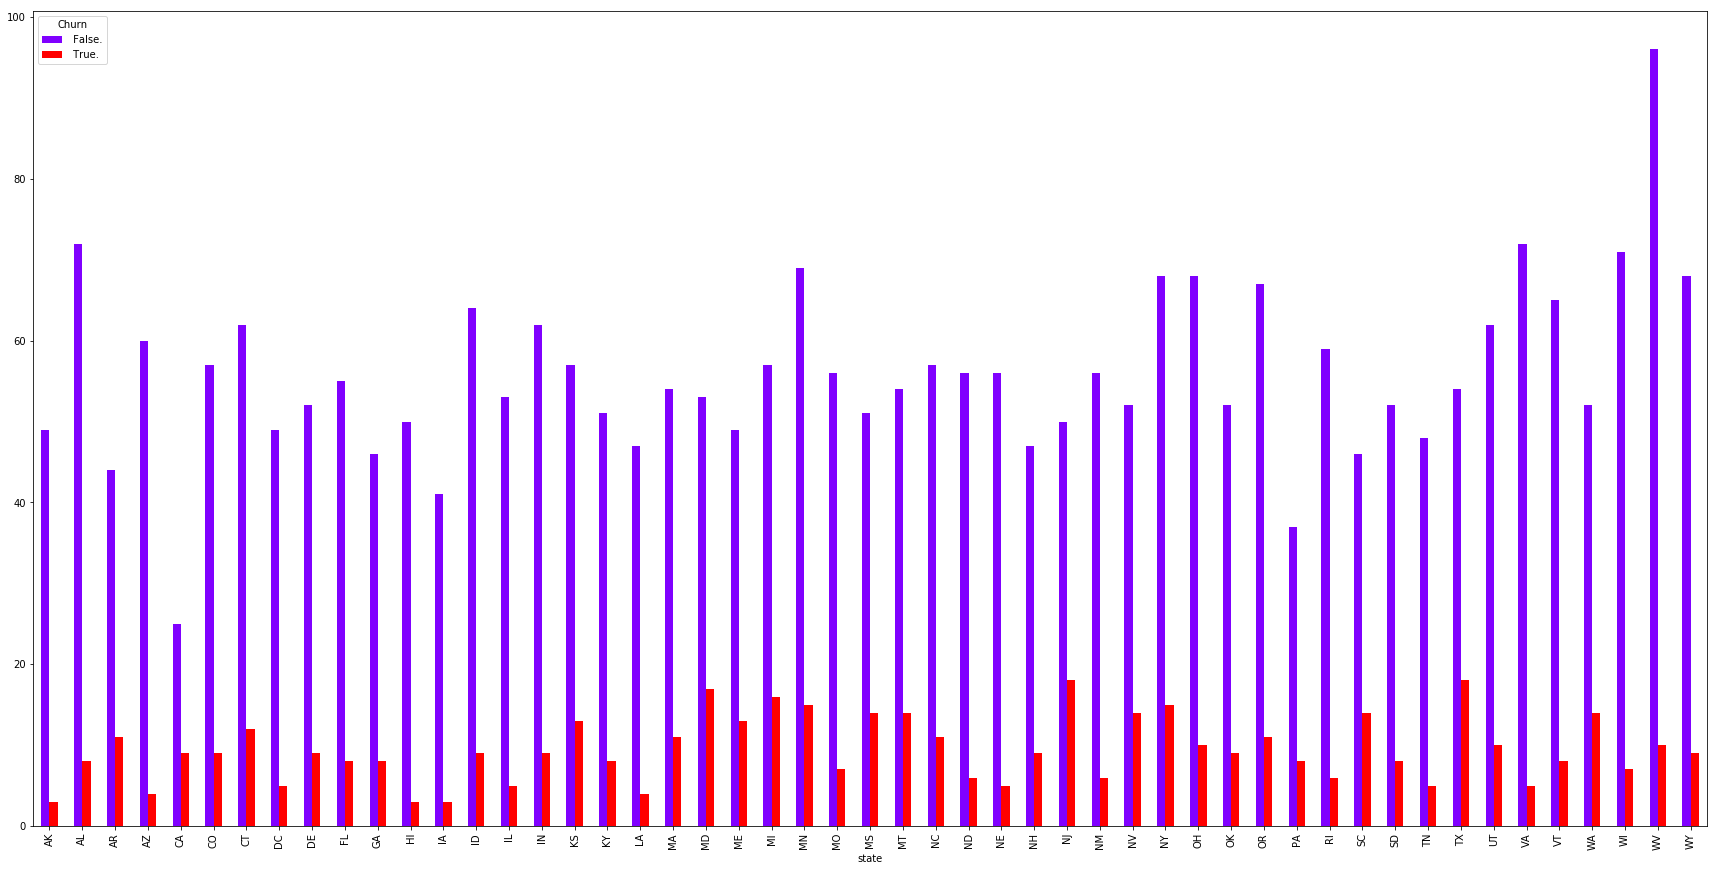

In [131]:
Churn_Train.groupby(["state", "Churn"]).size().unstack().plot(kind='bar', stacked=False, figsize=(30,15),cmap = 'rainbow')

### Churn Based On Area Code

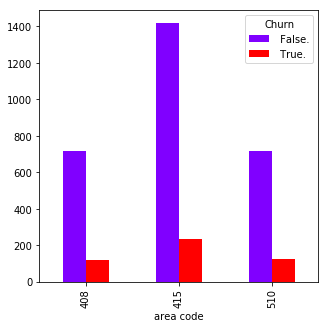

In [132]:
Churn_Train.groupby(["area code", "Churn"]).size().unstack().plot(kind='bar', stacked=False, figsize=(5,5),cmap = 'rainbow')

### Churn Based On International Plan

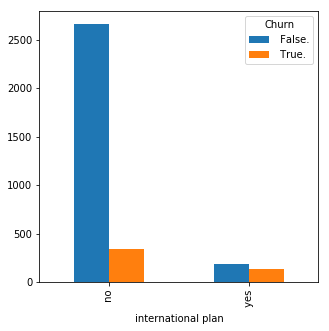

In [9]:
Churn_Train.groupby(["international plan", "Churn"]).size().unstack().plot(kind='bar', stacked=False, figsize=(5,5))

### Churn based on Voice Mail Plan

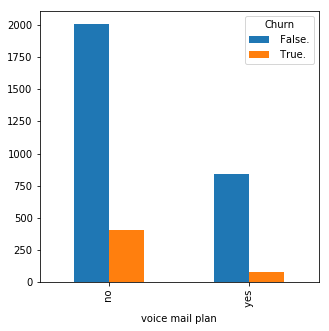

In [10]:
Churn_Train.groupby(["voice mail plan", "Churn"]).size().unstack().plot(kind='bar', stacked=False, figsize=(5,5)) 

## Convertion of Data Type For Categorical Variable In Test And Train Data

In [12]:
for i in range(0, Churn_Train.shape[1]):
    if(Churn_Train.iloc[:,i].dtypes == 'object'):
        Churn_Train.iloc[:,i] = pd.Categorical(Churn_Train.iloc[:,i])
        Churn_Train.iloc[:,i] = Churn_Train.iloc[:,i].cat.codes

In [13]:
for i in range(0, Churn_Test.shape[1]):
    if(Churn_Test.iloc[:,i].dtypes == 'object'):
        Churn_Test.iloc[:,i] = pd.Categorical(Churn_Test.iloc[:,i])
        Churn_Test.iloc[:,i] = Churn_Test.iloc[:,i].cat.codes   

#### Copying Target Variable: CHURN From Train and Test Data to Y_Train For Training and Y_Test For Test.

In [14]:
Y_Train = Churn_Train.Churn
Y_Test = Churn_Test.Churn

### Combining Train and Test Data for further analysis for Feature Selection

In [15]:
Combine = Churn_Train.append(Churn_Test)

In [16]:
Combine.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,16,128,415,1926,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,1575,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1117,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1707,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,110,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Shape of All Dataset For Future Split after feature Selection

In [17]:
print(Combine.shape, Churn_Train.shape, Churn_Test.shape)

(5000, 21) (3333, 21) (1667, 21)


### Creating a list of all continuous variable or numerical variable for Analysis of data

In [18]:
Numerical = ["account length","area code","number vmail messages","total day minutes","total day calls","total day charge",
           "total eve minutes","total eve calls","total eve charge","total night minutes","total night calls",
           "total night charge","total intl minutes","total intl calls", "total intl charge", 
           "number customer service calls"]

## Correlation between all Numerical variable and Plot for better understanding of Dataset and it's Correlation.

In [19]:
Df_Corr = Combine.loc[:,Numerical]

In [20]:
Corr = Df_Corr.corr()

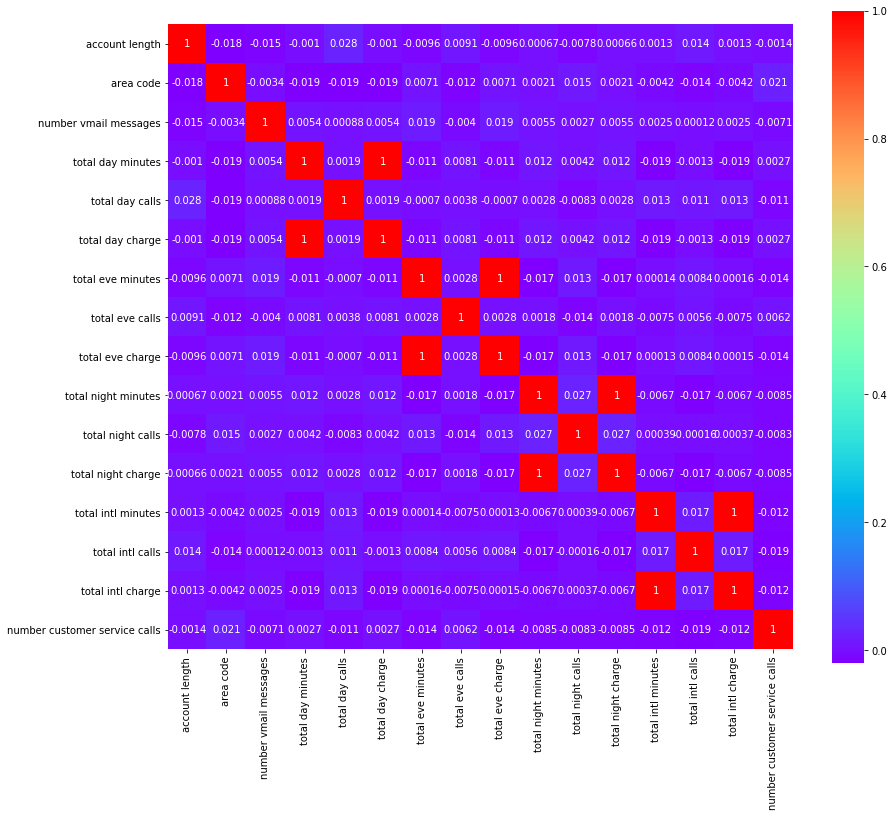

In [129]:
plt.figure(figsize=(14, 12))

sns.heatmap(Corr, mask=np.zeros_like(Corr,dtype=np.bool),cmap = 'rainbow',
           square = True, annot = True)

## Creating a list of Categorial Variable of dataset for Analysis and for Feature selection

In [22]:
Categorical = ["state","phone number","international plan","voice mail plan"]

### Applying Chi Sq Test to get most important feature for our Problem

In [23]:
from scipy.stats import chi2_contingency

In [25]:
for i in Categorical:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(Combine['Churn'],Combine[i]))
    print(p)

state
7.850836224371827e-05
phone number
0.7892627381002844
international plan
1.9443947474998577e-74
voice mail plan
7.164501780988496e-15


### Dropping all Unnecesary Feature Variable based on Correlation Output and Chi Sq. Output in a newly Created list Combine dataset

In [26]:
Combine = Combine.drop(["total day minutes", "total eve minutes", "total night minutes", "total intl minutes",
                        "phone number","Churn"], axis = 1)

In [27]:
Numerical = ["account length","area code","number vmail messages","total day calls","total day charge",
           "total eve calls","total eve charge","total night calls","total night charge","total intl calls", 
          "total intl charge", "number customer service calls"]

## Applying Normalization on Numerical Feature Variables

In [28]:
for i in Numerical:
    print(i)
    Combine[i] = (Combine[i]-min(Combine[i]))/(max(Combine[i])-min(Combine[i]))

account length
area code
number vmail messages
total day calls
total day charge
total eve calls
total eve charge
total night calls
total night charge
total intl calls
total intl charge
number customer service calls


### Spliting Dataset after analyzing and Feature selection in it's Original Shape as it was in Early

In [29]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split

C:\Users\Ghost\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
X_Train = Combine[:3333]
X_Test = Combine[3333:]

In [31]:
X_Train.shape

(3333, 15)

In [32]:
X_Test.shape

(1667, 15)

# Decision Tree

#### Model Creation For Decision Tree Using Entropy Classifier

In [33]:
C50_Model = tree.DecisionTreeClassifier(criterion = 'entropy')

### Fitting Model to Train Dataset to Train The Model

In [35]:
C50_Model.fit(X_Train, Y_Train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Prediction for Test Data

In [36]:
C50_Prediction = C50_Model.predict(X_Test)

In [38]:
C50_Prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

### Classification Report & Confusion Matrix For Model

In [39]:
from sklearn.metrics import confusion_matrix,classification_report

In [41]:
print("Confusion Matrix:")
print(confusion_matrix(Y_Test, C50_Prediction))
print("\n")
print("Classification Report:")
print(classification_report(Y_Test, C50_Prediction))

Confusion Matrix:
[[1375   68]
 [  72  152]]


Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.95      0.95      1443
          1       0.69      0.68      0.68       224

avg / total       0.92      0.92      0.92      1667



#### Accuracy = 92 % C50_Decision Tree Model

#### Cross Check Of Accuracy and False Negative Rate

In [44]:
CM = pd.crosstab(Y_Test, C50_Prediction)
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#### ACCURACY Decision Tree

In [45]:
accuracy_score(Y_Test, C50_Prediction)*100

91.60167966406718

#### False Negative Rate D_Tree

In [46]:
(FN*100)/(FN+TP)

32.142857142857146

#### OverAll Accuracy = 91.6 % And False Negataive Rate = 32.14 % With Decision Tree

## CROSS VALIDATION DT

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
CV_Accuracy_DT = cross_val_score(estimator= C50_Model, X= X_Train, y=Y_Train, cv=10)

In [52]:
CV_Accuracy_DT

array([0.89520958, 0.9251497 , 0.91017964, 0.91591592, 0.92492492,
       0.9039039 , 0.92792793, 0.92492492, 0.92192192, 0.92192192])

#### CV_Accuracy_DTree: 91.7 %

In [53]:
CV_Accuracy_DT.mean()

0.9171980363597129

In [54]:
CV_Accuracy_DT.std()

0.010264147235994852

# RANDOM FOREST

In [55]:
from sklearn.ensemble import RandomForestClassifier

#### Random Forest Model

In [56]:
RF_Model = RandomForestClassifier()

#### Training Dataset based on Model

In [57]:
RF_Model.fit(X_Train,Y_Train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Prediction on Test Data

In [58]:
RF_Prediction = RF_Model.predict(X_Test)

### Classification Report & Confusion Matrix For Model

In [59]:
print("Confusion Matrix:")
print(confusion_matrix(Y_Test, RF_Prediction))
print("\n")
print("Classification Report:")
print(classification_report(Y_Test, RF_Prediction))

Confusion Matrix:
[[1435    8]
 [ 111  113]]


Classification Report:
             precision    recall  f1-score   support

          0       0.93      0.99      0.96      1443
          1       0.93      0.50      0.66       224

avg / total       0.93      0.93      0.92      1667



#### Accuracy = 93 % Random Forest Model

#### Cross Check Of Accuracy and False Negative Rate

In [61]:
CM = pd.crosstab(Y_Test, RF_Prediction)
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
CM

col_0,0,1
Churn,,
0,1435,8
1,111,113


#### Accuracy Random Forest

In [62]:
accuracy_score(Y_Test, RF_Prediction)*100

92.86142771445711

#### False Negative Rate

In [63]:
(FN*100)/(FN+TP)

49.55357142857143

### CROSS VALIDATION RANDOM FOREST

In [64]:
CV_Accuracy_RF = cross_val_score(RF_Model, X=X_Train, y=Y_Train, cv=10)

In [66]:
CV_Accuracy_RF

array([0.93113772, 0.92215569, 0.91916168, 0.93693694, 0.93693694,
       0.94294294, 0.91891892, 0.91891892, 0.93093093, 0.94894895])

#### CV RANDOM FOREST ACCURACY

In [67]:
CV_Accuracy_RF.mean()

0.9306989624354894

In [68]:
CV_Accuracy_RF.std()

0.010220975398965451

#### OverAll Accuracy = 94% And False Negataive Rate = 41.5 % With Decision Tree



# LOGISTIC REGRESSION

In [69]:
from sklearn.linear_model import LogisticRegression

#### Logistic Regression Model

In [70]:
Log_Model = LogisticRegression()

#### Model Creation on Training Dataset

In [71]:
Log_Model.fit(X_Train, Y_Train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Prediction On Test Data with Trained Model

In [72]:
Log_Pred = Log_Model.predict(X_Test)

#### Confusion Matrix & Classification Report

In [73]:
print("Confusion Matrix:")
print(confusion_matrix(Y_Test, Log_Pred))
print("\n")
print("Classification Report:")
print(classification_report(Y_Test, Log_Pred))

Confusion Matrix:
[[1421   22]
 [ 187   37]]


Classification Report:
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1443
          1       0.63      0.17      0.26       224

avg / total       0.85      0.87      0.84      1667



#### Accuracy = 87 % Logistic Regression Model

#### Cross Check Of Accuracy and False Negative Rate

In [74]:
accuracy_score(Y_Test, Log_Pred)*100

87.4625074985003

In [76]:
CM = pd.crosstab(Y_Test, Log_Pred)
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
CM

col_0,0,1
Churn,,
0,1421,22
1,187,37


#### False Negative Rate

In [78]:
(FN*100)/(FN+TP)

83.48214285714286

### CROSS VALIDATION FOR LOGISTIC REGRESSION

In [79]:
CV_Accuracy_LR = cross_val_score(Log_Model, X=X_Train, y=Y_Train, cv=10)

In [80]:
CV_Accuracy_LR

array([0.84730539, 0.8742515 , 0.85928144, 0.85885886, 0.84984985,
       0.86486486, 0.87087087, 0.86786787, 0.86186186, 0.86186186])

#### CV Log_Regr Accuracy

In [81]:
CV_Accuracy_LR.mean()

0.861687435938933

In [82]:
CV_Accuracy_LR.std()

0.008070360218991223

#### OverAll Accuracy = 87% And False Negataive Rate = 83.5 % With Logistic Regression Model



# KNeighborsClassifier

In [83]:
from sklearn.neighbors import KNeighborsClassifier

### KNN Model Creation with n_neighbours = 1

In [84]:
KNN = KNeighborsClassifier(n_neighbors=1)

#### Training Model with Train Dataset

In [85]:
KNN.fit(X_Train,Y_Train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

#### Prediction with Test data

In [86]:
KNN_Prediction = KNN.predict(X_Test)

### Confusion Matrix and Classification Report KNN

In [87]:
print("Confusion Matrix:")
print(confusion_matrix(Y_Test, KNN_Prediction))
print("\n")
print("Classification Report:")
print(classification_report(Y_Test, KNN_Prediction))

Confusion Matrix:
[[1339  104]
 [ 159   65]]


Classification Report:
             precision    recall  f1-score   support

          0       0.89      0.93      0.91      1443
          1       0.38      0.29      0.33       224

avg / total       0.83      0.84      0.83      1667



#### Accuracy = 84 % KNN @ n_neighbour = 1

#### Now We will find best k_neighbor for KNN with Low Error Rate which requires Following implementation for better output.

In [88]:
Error_Rate = []

# Will take some time
for i in range(1,40):
    
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_Train,Y_Train)
    Prediction_i = KNN.predict(X_Test)
    Error_Rate.append(np.mean(Prediction_i != Y_Test))

#### Plotting Error Rate and K Value for better N_Neighbor in KNN

Text(0,0.5,'Error Rate')

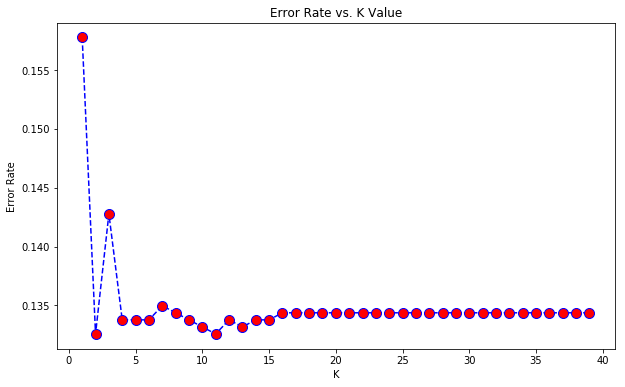

In [89]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),Error_Rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### As per above diagram we can observe after 5 n_neighbor there is not huge decrese in Error rate so we will move forward with KNN = 5

In [90]:
# NOW WITH K=5
KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(X_Train,Y_Train)
Pred_KNN = KNN.predict(X_Test)

print('WITH K=5')
print('\n')
print(confusion_matrix(Y_Test,Pred_KNN))
print('\n')
print(classification_report(Y_Test, Pred_KNN))

WITH K=5


[[1424   19]
 [ 204   20]]


             precision    recall  f1-score   support

          0       0.87      0.99      0.93      1443
          1       0.51      0.09      0.15       224

avg / total       0.83      0.87      0.82      1667



#### Accuracy = 87 % KNN Model

#### Cross Check Of Accuracy and False Negative Rate

In [91]:
accuracy_score(Y_Test, Pred_KNN)*100

86.62267546490702

In [92]:
CM = pd.crosstab(Y_Test, Pred_KNN)
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
CM

col_0,0,1
Churn,,
0,1424,19
1,204,20


#### False Negative Rate

In [94]:
(FN*100)/(FN+TP)

91.07142857142857

### Cross Validation For KNN

In [95]:
CV_Accuracy_KNN = cross_val_score(KNN, X=X_Train, y=Y_Train, cv=10)

In [96]:
CV_Accuracy_KNN 

array([0.85628743, 0.85329341, 0.84431138, 0.83783784, 0.86186186,
       0.84684685, 0.84684685, 0.85885886, 0.87087087, 0.84384384])

#### CV_Accuracy_KNN

In [97]:
CV_Accuracy_KNN.mean()

0.8520859182535829

In [98]:
CV_Accuracy_KNN.std()

0.00948528206904737

#### OverAll Accuracy = 87% And False Negataive Rate = 83.4 % With KNN



# NAIVE BAYE'S


In [99]:
from sklearn.naive_bayes import GaussianNB

#### Model Creation and Fitting Train data to model

In [100]:
NB_Model = GaussianNB().fit(X_Train,Y_Train)

#### Prediction on Test Data

In [101]:
Pred_NB = NB_Model.predict(X_Test)

#### Confusion Matrix and Classification Report of Naive Bayes

In [102]:
print("Confusion Matrix:")
print(confusion_matrix(Y_Test, Pred_NB))
print("\n")
print("Classification Report:")
print(classification_report(Y_Test, Pred_NB))

Confusion Matrix:
[[1342  101]
 [ 135   89]]


Classification Report:
             precision    recall  f1-score   support

          0       0.91      0.93      0.92      1443
          1       0.47      0.40      0.43       224

avg / total       0.85      0.86      0.85      1667



#### Accuracy = 86 % NAIVE BAYES

#### Cross Check Of Accuracy and False Negative Rate

In [103]:
CM = pd.crosstab(Y_Test, Pred_NB)
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
CM

col_0,0,1
Churn,,
0,1342,101
1,135,89


In [104]:
accuracy_score(Y_Test, Pred_NB)*100

85.84283143371326

### False Negative Rate

In [105]:
(FN*100)/(FN+TP)

60.267857142857146

#### CROSS VALIDATION NAIVE BAYES

In [106]:
CV_Accuracy_NB = cross_val_score(NB_Model, X=X_Train, y=Y_Train, cv=10)

In [109]:
CV_Accuracy_NB

array([0.8502994 , 0.86826347, 0.83832335, 0.83183183, 0.85585586,
       0.85285285, 0.85885886, 0.85585586, 0.84984985, 0.84384384])

### CV_Accuracy_NB Accuracy

In [110]:
CV_Accuracy_NB.mean()

0.8505835176493859

In [111]:
CV_Accuracy_NB.std()

0.009948802050850716

# SVM MODEL

## Train the Support Vector Classifier

In [112]:
from sklearn.svm import SVC

In [114]:
SVC_Model = SVC()

In [122]:
SVC_Model.fit(X_Train,Y_Train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Predictions and Evaluations

Now let's predict using the trained model.

In [116]:
SVM_Predictions = SVC_Model.predict(X_Test)

In [117]:
print(confusion_matrix(Y_Test,SVM_Predictions))

[[1439    4]
 [ 219    5]]


In [118]:
print(classification_report(Y_Test,SVM_Predictions))

             precision    recall  f1-score   support

          0       0.87      1.00      0.93      1443
          1       0.56      0.02      0.04       224

avg / total       0.83      0.87      0.81      1667



In [119]:
CM = pd.crosstab(Y_Test, SVM_Predictions)
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
CM

col_0,0,1
Churn,,
0,1439,4
1,219,5


In [120]:
accuracy_score(Y_Test, SVM_Predictions)*100

86.62267546490702

In [121]:
(FN*100)/(FN+TP)

97.76785714285714

#### OverAll Accuracy = 86.6% And False Negataive Rate = 97.7 % With SVM


#### ------------------------------------------
# CONCLUSION
#### -------------------------------------------

## After Implementing 5 Models
#### ----------------------------------------------------------------

### 1. Decision Tree : Accuracy = 92 %  ;  False Negative Rate = 32.1 %
### 2. Random Forest  :Accuracy =   94 %;  False Negative Rate = 41.5 %
### 3. Logistic Regression : Accuracy =   87 %;  False Negative Rate = 83.5 %
### 4. KNN = Accuracy =   87 % ;  False Negative Rate = 91.07 % 
### 5. Naive Bayes : Accuracy = 86 %  ;  False Negative Rate = 60.2 %
### 6. SVM : Accuracy = 87 %  ;  False Negative Rate = 97.7 %

#### After implemneting and Analusis we came to conclusion that Decision Tree have Lowest False Negative Rate i.e. 32.1 % that is far better than other models and have accuracy of 92 % so for Churn Reduction Problem Decision Turn out to be best to implement.

# THANK YOU !!!

In [128]:
pd.DataFrame(Churn_Test.columns)

,0
0,state
1,account length
2,area code
3,phone number
4,international plan
5,voice mail plan
6,number vmail messages
7,total day minutes
8,total day calls
9,total day charge
